In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
from scipy import stats
import sklearn 
import datetime
import analysis_utils
import pygrib
import os


In [2]:
NCEP_dataset = xr.open_dataset(os.environ['NCEP_DIR'] + 'air.2m.mon.mean.nc')
Berkeley_dataset = xr.open_dataset(os.environ['BERKELEY_DIR'] + 'Land_and_Ocean_LatLong1.nc')
ERA_dataset = xr.open_dataset(os.environ['ERA_DIR'] + 'ERA.nc')

/home/omeed/anaconda3/envs/ClimateAI/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'air' has multiple fill values {-32767, 32766}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


In [3]:
"""
Valid forecast/reanalysis types are: 'CFS', 'NMME, 'SEAS', 'Berkeley', 'NCEP, ERA'

Valid modes are: 'monthly', 'seasonal'

Valid times are: ['SON', 'JJA', 'DJF', 'MAM'] (seasons)
                 
                 and 
                 
                 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'] (months)
                 
                 or None
"""

forecast_dataset = xr.open_dataset(os.environ['SEAS_DIR'] + '1_month_SEAS_forecast.nc')
main_grid = xr.open_dataset(os.environ['GRID_DIR'] + 'main_grid.nc')
#a dummy grid to regrid all datasets to
forecast_type = 'SEAS'
forecast_start_time = '1993-02-01'
frequency = 'MS'
mode = 'monthly'
time = None
lead_time = 0

In [4]:
"""
Opens a NetCDF file containing the area of each grid cell
"""

grid_area_data_array = xr.open_dataset(os.environ['GRID_DIR'] + 'grid_area.nc')['cell_area'].values

In [5]:
reanalysis_ds_dict = {'NCEP': (NCEP_dataset, '1979-01-01'), 'Berkeley': (Berkeley_dataset, '1850-01-01'), 'ERA': (ERA_dataset, '1979-01-01')}

dict_type = 'reanalysis'

In [6]:
"""
analysis_utils.read_in_and_anomailze_multiple_datasets repeats the 
same operation as analysis_utils.read_in_and_anomalize_dataset 
(ie it cleans, regrids, and anomalizes each of the datasets)
and then also finds the intersection of the datasets.

forecast_da_dict is a dictionary of data arrays, corresponding to the 
forecast datasets in the dataset_dictionary. 

reanalysis_da is the reanalysis dataset where the time dimension is 
over the intersection of the forecast datasets.
"""

forecast_da, reanalysis_da_dict = analysis_utils.read_in_and_anomalize_multiple_datasets(reanalysis_ds_dict,
                                                                               dict_type, 
                                                                               forecast_dataset,
                                                                               main_grid,
                                                                               forecast_type,
                                                                               forecast_start_time,
                                                                               frequency,
                                                                               mode,
                                                                               time,
                                                                               lead_time
                                                                               )

/home/omeed/Data-Science-Thesis/notebooks/Preprocessing Notebookes/analysis_utils.py:206: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  sliced_reanalysis_ds.rename({'air': '2t'}, inplace=True)


Reuse existing file: nearest_s2d_181x360_94x192.nc
Create weight file: nearest_s2d_94x192_94x192.nc


/home/omeed/Data-Science-Thesis/notebooks/Preprocessing Notebookes/analysis_utils.py:200: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  sliced_reanalysis_ds.rename({'latitude': 'lat', 'longitude': 'lon', 'temperature': '2t'}, inplace=True)


Reuse existing file: nearest_s2d_181x360_94x192.nc
Reuse existing file: nearest_s2d_180x360_94x192.nc


/home/omeed/Data-Science-Thesis/notebooks/Preprocessing Notebookes/analysis_utils.py:210: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  sliced_reanalysis_ds.rename({'latitude': 'lat', 'longitude': 'lon', 't2m': '2t'}, inplace=True)


Reuse existing file: nearest_s2d_181x360_94x192.nc
Create weight file: nearest_s2d_721x1440_94x192.nc


In [7]:
NCEP_and_Berkeley_corr = analysis_utils.find_corr(reanalysis_da_dict['NCEP'], reanalysis_da_dict['Berkeley'])
ERA_and_Berkeley_corr = analysis_utils.find_corr(reanalysis_da_dict['ERA'], reanalysis_da_dict['Berkeley'])
ERA_and_NCEP_corr = analysis_utils.find_corr(reanalysis_da_dict['ERA'], reanalysis_da_dict['NCEP'])

/home/omeed/Data-Science-Thesis/notebooks/Preprocessing Notebookes/analysis_utils.py:533: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  llcrnrlon=min(lons), urcrnrlat=max(lats), urcrnrlon=max(lons), resolution = 'c')


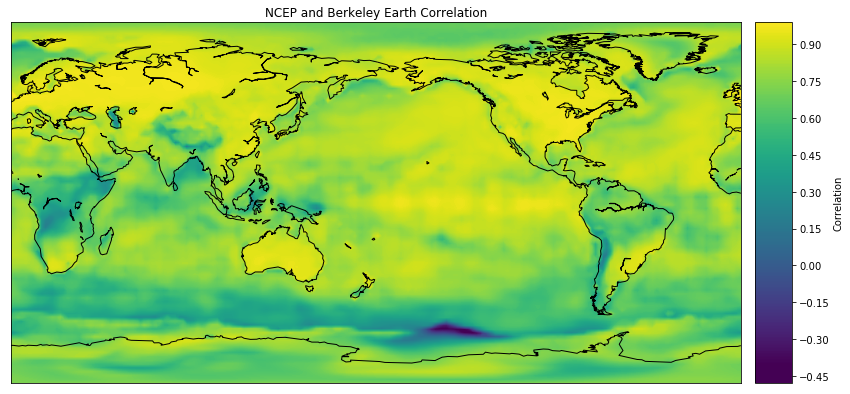

In [8]:
title = 'NCEP and Berkeley Earth Correlation'
analysis_utils.plot_global(NCEP_and_Berkeley_corr, main_grid['lat'], main_grid['lon'], title, 'Correlation',-.4, 1, 'viridis')

/home/omeed/Data-Science-Thesis/notebooks/Preprocessing Notebookes/analysis_utils.py:533: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  llcrnrlon=min(lons), urcrnrlat=max(lats), urcrnrlon=max(lons), resolution = 'c')


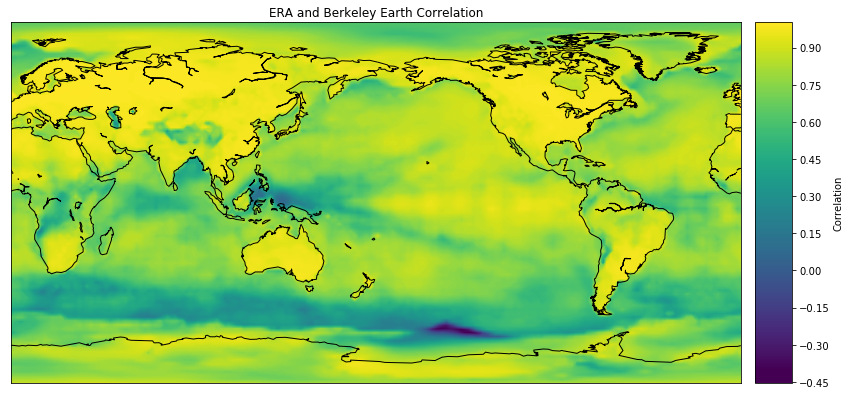

In [9]:
title = 'ERA and Berkeley Earth Correlation'
analysis_utils.plot_global(ERA_and_Berkeley_corr, main_grid['lat'], main_grid['lon'], title, 'Correlation',-.4, 1, 'viridis')

/home/omeed/Data-Science-Thesis/notebooks/Preprocessing Notebookes/analysis_utils.py:533: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  llcrnrlon=min(lons), urcrnrlat=max(lats), urcrnrlon=max(lons), resolution = 'c')


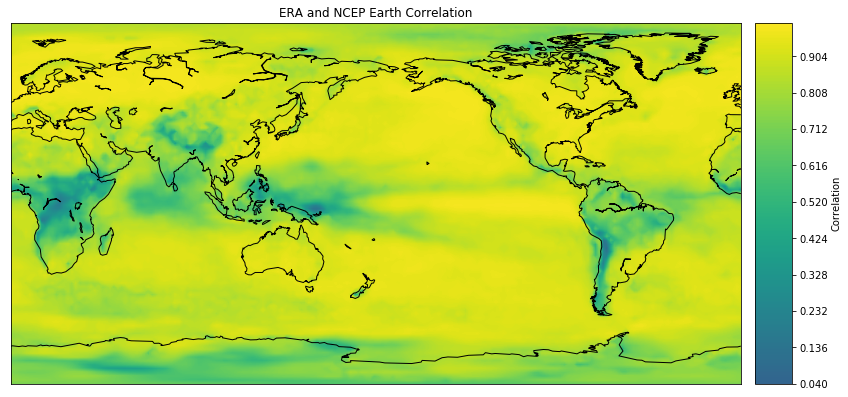

In [10]:
title = 'ERA and NCEP Earth Correlation'
analysis_utils.plot_global(ERA_and_NCEP_corr, main_grid['lat'], main_grid['lon'], title, 'Correlation',-.4, 1, 'viridis')